
# Robust linear model estimation using RANSAC


In this example we see how to robustly fit a linear model to faulty data using
the *Random Sample Consensus(RANSAC)* algorithm.

Class descriptor for Scikit-learn's RANSAC implementation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

Wikipedia Page for Random Sample Consensus(RANSAC):
https://en.wikipedia.org/wiki/Random_sample_consensus



In [9]:
%matplotlib inline

In [10]:
#import modules
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [11]:
n_samples = 1000
n_outliers = 50

#builds inlier data set
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

In [18]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3+ 0.5* np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -300 + 10 * np.random.normal(size=n_outliers)

In [19]:
# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [21]:
# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

In [22]:
# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

Estimated coefficients (true, normal, RANSAC):
82.1903908407869 [ 22.81273573] [ 82.08533159]


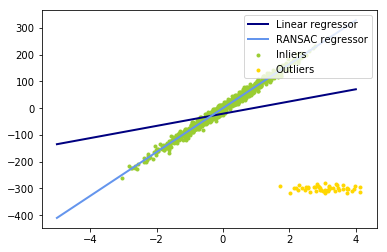

In [23]:
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linestyle='-', linewidth=lw,
         label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linestyle='-',
         linewidth=lw, label='RANSAC regressor')
plt.legend(loc='upper right')
plt.show()